* Deletions
* HG002 Only
* Technology: 250bp

* The following classifier will train on and predict the following labels:
    - GTcons
    
* All -1 values have been removed from the train and test set

In [1]:
"""
Imports
"""
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [7]:
# Import Training Data
# SVanalyzer generated training data
df_train = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/train/tech_sep/DEL/no_minus_one/300x_HG002_no-1_DEL.csv')
df_train_2 = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/train/tech_sep/DEL/no_minus_one/300x_HG002_no-1_DEL.csv')
df_train.rename(columns={'size': 'Size'}, inplace=True)
df_train.head(1)

,chrom,id,sample,start,end,type,SVtype,Size,refN_cnt,refN_pct,...,Ill300x.amb_reason_orientation_orientation,Ill300x.amb_reason_same_scores,Ill300x.ref_alnScore_mean,Ill300x.ref_alnScore_std,Ill300x.ref_count,Ill300x.ref_insertSize_mean,Ill300x.ref_insertSize_std,Ill300x.ref_reason_alignmentScore,Ill300x.ref_reason_insertSizeScore,Ill300x.ref_reason_orientation
0,1,39,HG002,109690878,109690918,Insertion,Deletion,-39,0,0,...,7.0,272.0,584.127907,11.328393,172.0,587.226744,143.664138,172.0,0.0,0.0


In [8]:
# Import Test Data
# SVanalyzer generated training data
df_test = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/test/tech_sep/DEL/no_minus_one/300x_HG002_no-1_DEL.csv')
df_test_2 = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/test/tech_sep/DEL/no_minus_one/300x_HG002_no-1_DEL.csv')
df_test.rename(columns={'size': 'Size'}, inplace=True)
df_test.head(1)

,chrom,id,sample,start,end,type,SVtype,Size,refN_cnt,refN_pct,...,Ill300x.amb_reason_orientation_orientation,Ill300x.amb_reason_same_scores,Ill300x.ref_alnScore_mean,Ill300x.ref_alnScore_std,Ill300x.ref_count,Ill300x.ref_insertSize_mean,Ill300x.ref_insertSize_std,Ill300x.ref_reason_alignmentScore,Ill300x.ref_reason_insertSizeScore,Ill300x.ref_reason_orientation
0,5,1,HG002,15411043,15411104,Insertion,Deletion,-60,0,0,...,1.0,12.0,583.037037,12.830754,27.0,539.555556,177.796874,27.0,0.0,0.0


In [9]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(c) - set(d)

{'Label'}

In [10]:
### Drop columns that are not shared by both dataframes
df_train.drop(['Label'], axis=1, inplace = True)
df_train.drop(['GTconflict'], axis=1, inplace = True)
df_train.drop(['GTsupp'], axis=1, inplace = True)
df_train.drop(['sample'], axis=1, inplace = True)
df_train.drop(['SVtype'], axis=1, inplace = True)
df_train.drop(['type'], axis=1, inplace = True)
df_train.drop(['id'], axis=1, inplace = True)

In [11]:
df_train.head(1)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,Ill300x.amb_reason_orientation_orientation,Ill300x.amb_reason_same_scores,Ill300x.ref_alnScore_mean,Ill300x.ref_alnScore_std,Ill300x.ref_count,Ill300x.ref_insertSize_mean,Ill300x.ref_insertSize_std,Ill300x.ref_reason_alignmentScore,Ill300x.ref_reason_insertSizeScore,Ill300x.ref_reason_orientation
0,1,109690878,109690918,-39,0,0,0,0.0,1,0.4,...,7.0,272.0,584.127907,11.328393,172.0,587.226744,143.664138,172.0,0.0,0.0


In [12]:
df_train['chrom'].replace('X', 23, inplace=True)
df_train['chrom'].replace('Y', 24, inplace=True)
df_test['chrom'].replace('X', 23, inplace=True)
df_test['chrom'].replace('Y', 24, inplace=True)

In [13]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(d) - set(c)

{'GTconflict',
 'GTsupp',
 'Ill300x.amb_reason_alignmentScore_insertSizeScore',
 'SVtype',
 'id',
 'sample',
 'type'}

In [14]:
### Drop columns that are not shared by both dataframes
df_test.drop(['Ill300x.amb_reason_alignmentScore_insertSizeScore'], axis=1, inplace = True)
df_test.drop(['GTcons'], axis=1, inplace = True)
df_test.drop(['GTconflict'], axis=1, inplace = True)
df_test.drop(['GTsupp'], axis=1, inplace = True)
df_test.drop(['sample'], axis=1, inplace = True)
df_test.drop(['SVtype'], axis=1, inplace = True)
df_test.drop(['type'], axis=1, inplace = True)
df_test.drop(['id'], axis=1, inplace = True)

***
Impute missing values using KNN
***

In [15]:
# Store training data in a new variable which will be converted to a matrix
X = df_train
X.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,Ill300x.amb_reason_orientation_orientation,Ill300x.amb_reason_same_scores,Ill300x.ref_alnScore_mean,Ill300x.ref_alnScore_std,Ill300x.ref_count,Ill300x.ref_insertSize_mean,Ill300x.ref_insertSize_std,Ill300x.ref_reason_alignmentScore,Ill300x.ref_reason_insertSizeScore,Ill300x.ref_reason_orientation
0,1,109690878,109690918,-39,0,0,0,0.000000,1,0.4,...,7.0,272.0,584.127907,11.328393,172.0,587.226744,143.664138,172.0,0.0,0.0
1,1,1869280,1869312,-31,0,0,0,0.000000,0,0.0,...,3.0,232.0,588.235955,8.490606,178.0,602.584270,164.730649,178.0,0.0,0.0
2,1,2891239,2891284,-44,0,0,1,0.666667,1,1.0,...,2.0,216.0,573.160000,15.431604,25.0,651.800000,127.773863,25.0,0.0,0.0


In [16]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/2340 with 3 missing, elapsed time: 1.662
Imputing row 101/2340 with 3 missing, elapsed time: 1.713
Imputing row 201/2340 with 3 missing, elapsed time: 1.726
Imputing row 301/2340 with 3 missing, elapsed time: 1.740
Imputing row 401/2340 with 3 missing, elapsed time: 1.753
Imputing row 501/2340 with 3 missing, elapsed time: 1.764
Imputing row 601/2340 with 3 missing, elapsed time: 1.776
Imputing row 701/2340 with 2 missing, elapsed time: 1.786
Imputing row 801/2340 with 2 missing, elapsed time: 1.795
Imputing row 901/2340 with 2 missing, elapsed time: 1.805
Imputing row 1001/2340 with 2 missing, elapsed time: 1.813
Imputing row 1101/2340 with 2 missing, elapsed time: 1.822
Imputing row 1201/2340 with 2 missing, elapsed time: 1.831
Imputing row 1301/2340 with 2 missing, elapsed time: 1.839
Imputing row 1401/2340 with 0 missing, elapsed time: 1.845
Imputing row 1501/2340 with 0 missing, elapsed time: 1.850
Imputing row 1601/2340 with 0 missing, elapsed time: 1.850
Imputing 

In [17]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
dftrain_header = list(df_train.columns.values)
X.columns = dftrain_header
X.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,Ill300x.amb_reason_orientation_orientation,Ill300x.amb_reason_same_scores,Ill300x.ref_alnScore_mean,Ill300x.ref_alnScore_std,Ill300x.ref_count,Ill300x.ref_insertSize_mean,Ill300x.ref_insertSize_std,Ill300x.ref_reason_alignmentScore,Ill300x.ref_reason_insertSizeScore,Ill300x.ref_reason_orientation
0,1.0,109690878.0,109690918.0,-39.0,0.0,0.0,0.0,0.000000,1.0,0.4,...,7.0,272.0,584.127907,11.328393,172.0,587.226744,143.664138,172.0,0.0,0.0
1,1.0,1869280.0,1869312.0,-31.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,3.0,232.0,588.235955,8.490606,178.0,602.584270,164.730649,178.0,0.0,0.0
2,1.0,2891239.0,2891284.0,-44.0,0.0,0.0,1.0,0.666667,1.0,1.0,...,2.0,216.0,573.160000,15.431604,25.0,651.800000,127.773863,25.0,0.0,0.0


In [18]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y['GTcons'] = X['GTcons']

In [19]:
#Count the number of labels
pd.value_counts(Y['GTcons'].values, sort=False)

 1.0     642
-1.0     368
 2.0     154
 0.0    1176
dtype: int64

In [20]:
# Note: originally selected 1000 of each label --> find out why some are lost

In [21]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [22]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

** Train RF Classifier **

In [23]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)

In [24]:
# %%timeit
# Train Random Forest Classifier
model = RandomForestClassifier() 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [25]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.133006)
2. feature 3 (0.107270)
3. feature 4 (0.062824)
4. feature 27 (0.059123)
5. feature 30 (0.045107)
6. feature 5 (0.037944)
7. feature 28 (0.033524)
8. feature 24 (0.030129)
9. feature 29 (0.029967)
10. feature 16 (0.029204)
11. feature 11 (0.027989)
12. feature 33 (0.027347)
13. feature 13 (0.025856)
14. feature 20 (0.024951)
15. feature 2 (0.024939)
16. feature 9 (0.024487)
17. feature 40 (0.024296)
18. feature 14 (0.024082)
19. feature 26 (0.023038)
20. feature 0 (0.022763)
21. feature 25 (0.022503)
22. feature 35 (0.020716)
23. feature 34 (0.020686)
24. feature 23 (0.020280)
25. feature 12 (0.019270)
26. feature 10 (0.018893)
27. feature 1 (0.017082)
28. feature 7 (0.009181)
29. feature 42 (0.008030)
30. feature 41 (0.005784)
31. feature 39 (0.005340)
32. feature 18 (0.004975)
33. feature 21 (0.004225)
34. feature 38 (0.003191)
35. feature 32 (0.001078)
36. feature 8 (0.000452)
37. feature 19 (0.000284)
38. feature 17 (0.000185)
39. feature 15

[Another Resource](https://stackoverflow.com/questions/37877542/how-to-label-the-feature-importance-with-forests-of-trees)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



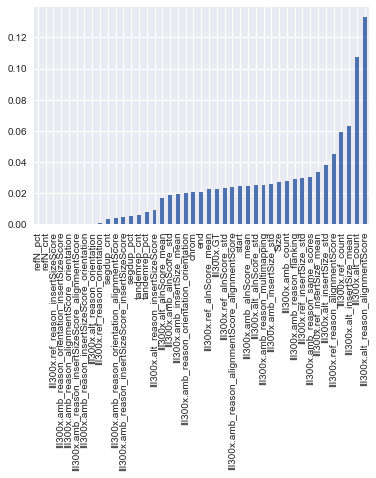

In [26]:
%matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index=X_test.columns)
feature_importances.sort()
feature_importances.plot.bar()

In [27]:
#TODO: Try training the model with the most important features and note difference in overal model prediction score

In [28]:
#NOTE: Training Set - Show number of Hom Ref, Hom Var, Het Var datapoints the model was trained on
ytrain = pd.DataFrame()
ytrain['ytrain'] = y_train
pd.value_counts(ytrain['ytrain'].values, sort=False)

 1.0    337
-1.0    129
 2.0     92
 0.0    568
dtype: int64

In [29]:
model.predict(X_test)

array([ 0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0., -1.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  0.,  0., -1.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  0.,  1., -1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1., -1.,
        0.,  1.,  1., -1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
        0., -1., -1., -1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  1.,  0.,  0.,  1.,  0., -1.,  0.,  1.,  1.,  0., -1.,  0.,
        1., -1.,  0., -1.,  0., -1.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,
        0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0

In [30]:
pred = model.predict(X_test)

In [31]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(pred, y_test, average='micro'))) 

Precision score of the training subset: 0.707


In [32]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
df_Xtest.head()

,Ill300x.GT,Ill300x.alt_alnScore_mean,Ill300x.alt_alnScore_std,Ill300x.alt_count,Ill300x.alt_insertSize_mean,Ill300x.alt_insertSize_std,Ill300x.alt_reason_alignmentScore,Ill300x.alt_reason_insertSizeScore,Ill300x.alt_reason_orientation,Ill300x.amb_alnScore_mean,...,Size,chrom,end,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
1980,0.0,586.666667,4.988877,3.0,1177.666667,14.383633,0.0,3.0,0.0,532.116119,...,-41.0,4.0,38598858.0,0.0,0.0,0.0,0.0,38598817.0,1.0,0.073171
2078,0.0,575.000000,12.083046,3.0,656.000000,119.936094,0.0,3.0,0.0,546.110705,...,-475.0,5.0,179065925.0,0.0,0.0,0.0,0.0,179065450.0,2.0,0.080000
9,-1.0,557.364865,12.894661,148.0,573.891892,157.803895,147.0,1.0,0.0,518.811636,...,-20.0,1.0,24220960.0,0.0,0.0,0.0,0.0,24220939.0,1.0,1.000000
1117,-1.0,579.275862,6.291190,29.0,579.310345,189.072528,28.0,1.0,0.0,540.653612,...,-22.0,4.0,187058131.0,0.0,0.0,0.0,0.0,187058108.0,1.0,1.000000
195,0.0,579.000000,13.379088,4.0,817.250000,91.521514,0.0,4.0,0.0,526.236294,...,-232.0,15.0,71991778.0,0.0,0.0,0.0,0.0,71991545.0,2.0,0.197425


In [33]:
labels = pd.DataFrame(y_test)

In [34]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_train['GTcons']
df_Xtest['chrom'] = df_train['chrom']
df_Xtest['start'] = df_train['start']
df_Xtest['end'] = df_train['end']
# df_Xtest['Y_test'] = labels

In [35]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

 0    352
 1    189
 2     46
-1    115
dtype: int64

In [36]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

 0.0    374
 1.0    240
-1.0     77
 2.0     11
dtype: int64

In [37]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[ 27  38  49   1]
 [ 16 323  12   1]
 [ 25  11 145   8]
 [  9   2  34   1]]


In [38]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-1.0,0.0,1.0,2.0,All
True,,,,,
-1,27,38,49,1,115
0,16,323,12,1,352
1,25,11,145,8,189
2,9,2,34,1,46
All,77,374,240,11,702


In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

             precision    recall  f1-score   support

         -1       0.35      0.23      0.28       115
          0       0.86      0.92      0.89       352
          1       0.60      0.77      0.68       189
          2       0.09      0.02      0.04        46

avg / total       0.66      0.71      0.68       702



***
Predict
***

** Load Data **

In [40]:
X2 = df_test

** Impute missing values using KNN **

In [41]:
#Convert dataframe to matrix
X2=X2.as_matrix()

#Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/4995 with 2 missing, elapsed time: 7.976
Imputing row 101/4995 with 2 missing, elapsed time: 7.984
Imputing row 201/4995 with 2 missing, elapsed time: 7.993
Imputing row 301/4995 with 2 missing, elapsed time: 8.001
Imputing row 401/4995 with 2 missing, elapsed time: 8.010
Imputing row 501/4995 with 2 missing, elapsed time: 8.019
Imputing row 601/4995 with 2 missing, elapsed time: 8.027
Imputing row 701/4995 with 2 missing, elapsed time: 8.036
Imputing row 801/4995 with 2 missing, elapsed time: 8.044
Imputing row 901/4995 with 2 missing, elapsed time: 8.052
Imputing row 1001/4995 with 2 missing, elapsed time: 8.061
Imputing row 1101/4995 with 2 missing, elapsed time: 8.069
Imputing row 1201/4995 with 2 missing, elapsed time: 8.078
Imputing row 1301/4995 with 2 missing, elapsed time: 8.086
Imputing row 1401/4995 with 2 missing, elapsed time: 8.095
Imputing row 1501/4995 with 2 missing, elapsed time: 8.103
Imputing row 1601/4995 with 2 missing, elapsed time: 8.112
Imputing 

In [42]:
dftest_header = list(df_test.columns.values)
X2.columns = dftest_header
X2.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,Ill300x.amb_reason_orientation_orientation,Ill300x.amb_reason_same_scores,Ill300x.ref_alnScore_mean,Ill300x.ref_alnScore_std,Ill300x.ref_count,Ill300x.ref_insertSize_mean,Ill300x.ref_insertSize_std,Ill300x.ref_reason_alignmentScore,Ill300x.ref_reason_insertSizeScore,Ill300x.ref_reason_orientation
0,5.0,15411043.0,15411104.0,-60.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,1.0,12.0,583.037037,12.830754,27.0,539.555556,177.796874,27.0,0.0,0.0
1,7.0,158112624.0,158112712.0,-88.0,0.0,0.0,0.0,0.0,2.0,0.715909,...,3.0,28.0,544.232558,18.907163,43.0,734.372093,159.775573,43.0,0.0,0.0
2,4.0,95498964.0,95499280.0,-316.0,0.0,0.0,0.0,0.0,1.0,0.117089,...,5.0,71.0,588.000000,6.226494,13.0,831.000000,202.968357,13.0,0.0,0.0


In [43]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,Ill300x.amb_reason_orientation_orientation,Ill300x.amb_reason_same_scores,Ill300x.ref_alnScore_mean,Ill300x.ref_alnScore_std,Ill300x.ref_count,Ill300x.ref_insertSize_mean,Ill300x.ref_insertSize_std,Ill300x.ref_reason_alignmentScore,Ill300x.ref_reason_insertSizeScore,Ill300x.ref_reason_orientation
0,5.0,15411043.0,15411104.0,-60.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,1.0,12.0,583.037037,12.830754,27.0,539.555556,177.796874,27.0,0.0,0.0
1,7.0,158112624.0,158112712.0,-88.0,0.0,0.0,0.0,0.0,2.0,0.715909,...,3.0,28.0,544.232558,18.907163,43.0,734.372093,159.775573,43.0,0.0,0.0
2,4.0,95498964.0,95499280.0,-316.0,0.0,0.0,0.0,0.0,1.0,0.117089,...,5.0,71.0,588.000000,6.226494,13.0,831.000000,202.968357,13.0,0.0,0.0


In [44]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [45]:
model.predict(X5)

array([ 0., -1.,  1., ...,  1.,  0.,  0.])

In [46]:
pred = model.predict(X5)

In [47]:
X5['predicted_label'] = pred
X5['chrom'] = df_test_2['chrom']
X5['start'] = df_test_2['start']
X5['end'] = df_test_2['end']
X5['Size'] = df_test_2['Size']
X5['GTcons'] = df_test_2['GTcons']
X5['GTsupp'] = df_test_2['GTsupp']

In [48]:
X5.head(3)

,Ill300x.GT,Ill300x.alt_alnScore_mean,Ill300x.alt_alnScore_std,Ill300x.alt_count,Ill300x.alt_insertSize_mean,Ill300x.alt_insertSize_std,Ill300x.alt_reason_alignmentScore,Ill300x.alt_reason_insertSizeScore,Ill300x.alt_reason_orientation,Ill300x.amb_alnScore_mean,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
0,-1.0,579.333333,4.714045,3.0,545.666667,36.971460,3.0,0.0,0.0,533.223183,...,0.0,0.0,0.0,0.0,15411043,1.0,1.000000,0.0,-1,0
1,-1.0,562.958333,14.881418,24.0,956.000000,279.702967,8.0,16.0,0.0,496.258920,...,0.0,0.0,0.0,0.0,158112624,2.0,0.715909,-1.0,-1,0
2,-1.0,583.311364,10.419207,440.0,648.368182,157.060500,264.0,174.0,2.0,528.254690,...,0.0,0.0,0.0,0.0,95498964,1.0,0.117089,1.0,2,1


***
Label Analysis
***

In [49]:
df_new = pd.DataFrame()
df_new['true'] = df_test_2['GTcons'].astype(float)
df_new['predicted'] = pred
df_new['predicted'] = df_new['predicted'].astype(float)

In [50]:
pd.value_counts(df_new['true'].values, sort=False)

-1.0    1491
 2.0     671
 1.0    1912
 0.0     921
dtype: int64

In [51]:
pd.value_counts(df_new['predicted'].values, sort=False)

 0.0    1127
-1.0     693
 1.0    2955
 2.0     220
dtype: int64

In [52]:
# Calculate Precision Score
true = df_new['true']
predicted = df_new['predicted']
print('Precision score of the test subset: {:.3f}'.format(precision_score(true, predicted, average='micro'))) 

Precision score of the test subset: 0.561


In [53]:
pd.crosstab(true, predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-1.0,0.0,1.0,2.0,All
True,,,,,
-1.0,321,230,881,59,1491
0.0,59,838,24,0,921
1.0,242,55,1548,67,1912
2.0,71,4,502,94,671
All,693,1127,2955,220,4995


#### Crowdsourced (Crowdvariant) Results
![Figure1](https://raw.githubusercontent.com/lesleymaraina/NIST/master/Notebooks/SVanalyzer_ML/DEL/images/CrowdVar_250bp.png)

#Note: the higher precision score from the model trained with svanalyzer data may be due in part to svanalyzer data having more hom_ref training examples than the CrowdVar dataset

** Exact Match **

In [54]:
em = X5['predicted_label'] == 1.0
exact_match = X5[em]

In [55]:
exact_match.head(1)

,Ill300x.GT,Ill300x.alt_alnScore_mean,Ill300x.alt_alnScore_std,Ill300x.alt_count,Ill300x.alt_insertSize_mean,Ill300x.alt_insertSize_std,Ill300x.alt_reason_alignmentScore,Ill300x.alt_reason_insertSizeScore,Ill300x.alt_reason_orientation,Ill300x.amb_alnScore_mean,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
2,-1.0,583.311364,10.419207,440.0,648.368182,157.0605,264.0,174.0,2.0,528.25469,...,0.0,0.0,0.0,0.0,95498964,1.0,0.117089,1.0,2,1


In [56]:
output_notebook()
p = figure()
p = Histogram(exact_match, values='GTcons', title='Exact_Match_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

Loading BokehJS ...

** Homozygous Reference **

In [57]:
hr = X5['predicted_label'] == 0.0
hom_ref = X5[hr]
hom_ref.head(1)

,Ill300x.GT,Ill300x.alt_alnScore_mean,Ill300x.alt_alnScore_std,Ill300x.alt_count,Ill300x.alt_insertSize_mean,Ill300x.alt_insertSize_std,Ill300x.alt_reason_alignmentScore,Ill300x.alt_reason_insertSizeScore,Ill300x.alt_reason_orientation,Ill300x.amb_alnScore_mean,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
0,-1.0,579.333333,4.714045,3.0,545.666667,36.97146,3.0,0.0,0.0,533.223183,...,0.0,0.0,0.0,0.0,15411043,1.0,1.0,0.0,-1,0


In [58]:
output_notebook()
p = figure()
p = Histogram(hom_ref, values='GTcons', title='Homozygous_Reference_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

Loading BokehJS ...

** Inaccurate Call **

In [59]:
ic = X5['predicted_label'] == 2.0
inac_call = X5[ic]
inac_call.head(1)

,Ill300x.GT,Ill300x.alt_alnScore_mean,Ill300x.alt_alnScore_std,Ill300x.alt_count,Ill300x.alt_insertSize_mean,Ill300x.alt_insertSize_std,Ill300x.alt_reason_alignmentScore,Ill300x.alt_reason_insertSizeScore,Ill300x.alt_reason_orientation,Ill300x.amb_alnScore_mean,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
4,1.0,581.966216,3.341822,148.0,585.952703,147.540527,147.0,1.0,0.0,538.112636,...,0.0,0.0,0.0,0.0,76766532,0.0,0.0,2.0,1,2


In [ ]:
output_notebook()
p = figure()
p = Histogram(inac_call, values='GTcons', title='Inaccurate_Call_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

Loading BokehJS ...